In [2]:
# загружаем все необходимые нам в работе библиотеки
import numpy as np
from scipy.stats import t
from scipy.stats import norm
from scipy.stats import skew, kurtosis
from scipy.stats import norm
import matplotlib.pyplot as plt
from scipy import stats
import statistics
import pandas as pd
import io
import requests
import seaborn as sns

%matplotlib inline

In [3]:
#  загружаем и читаем файл для дальнейшей работы
df = pd.read_csv('hr.csv')

In [4]:
# читаем несколько первых строк файла, чтобы посмотреть, с какими данныем и нам предстоит иметь дело
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [5]:
# смотрим файл на наличие null и трудночитаемых типов
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
satisfaction_level       14999 non-null float64
last_evaluation          14999 non-null float64
number_project           14999 non-null int64
average_montly_hours     14999 non-null int64
time_spend_company       14999 non-null int64
Work_accident            14999 non-null int64
left                     14999 non-null int64
promotion_last_5years    14999 non-null int64
sales                    14999 non-null object
salary                   14999 non-null object
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [6]:
# Количество null по переменным
df.isnull().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
sales                    0
salary                   0
dtype: int64

In [7]:
df.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


### Рассчет основных статистик для переменных (среднее,медиана,мода,мин/макс,сред.отклонение).

In [8]:
# Рассчитать и визуализировать корреляционную матрицу для переменных
df_corr = df.corr()
df_corr

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
satisfaction_level,1.000000,0.105021,-0.142970,-0.020048,-0.100866,0.058697,-0.388375,0.025605
last_evaluation,0.105021,1.000000,0.349333,0.339742,0.131591,-0.007104,0.006567,-0.008684
number_project,-0.142970,0.349333,1.000000,0.417211,0.196786,-0.004741,0.023787,-0.006064
average_montly_hours,-0.020048,0.339742,0.417211,1.000000,0.127755,-0.010143,0.071287,-0.003544
time_spend_company,-0.100866,0.131591,0.196786,0.127755,1.000000,0.002120,0.144822,0.067433
Work_accident,0.058697,-0.007104,-0.004741,-0.010143,0.002120,1.000000,-0.154622,0.039245
left,-0.388375,0.006567,0.023787,0.071287,0.144822,-0.154622,1.000000,-0.061788
promotion_last_5years,0.025605,-0.008684,-0.006064,-0.003544,0.067433,0.039245,-0.061788,1.000000


### Рассчитаем и визуализируем корреляционную матрицу для переменных.

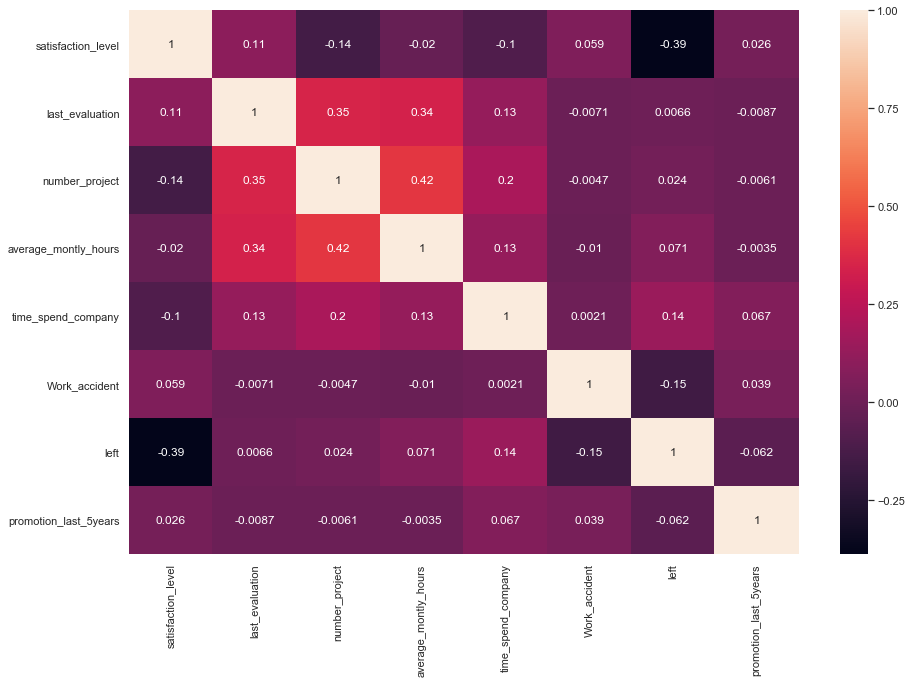

In [9]:
sns.set(rc=({'figure.figsize':(15,10)}))
sns.heatmap(df_corr,annot = True);

из визуализированной матрицы видно переменные которые наиболее всего взаимодействуют между собой. Это 
satisfaction_level и number_project, Work_accident и left, last_evaluation and average_montly_hours

### Визуализируем несколько взаимосвязей между переменными.

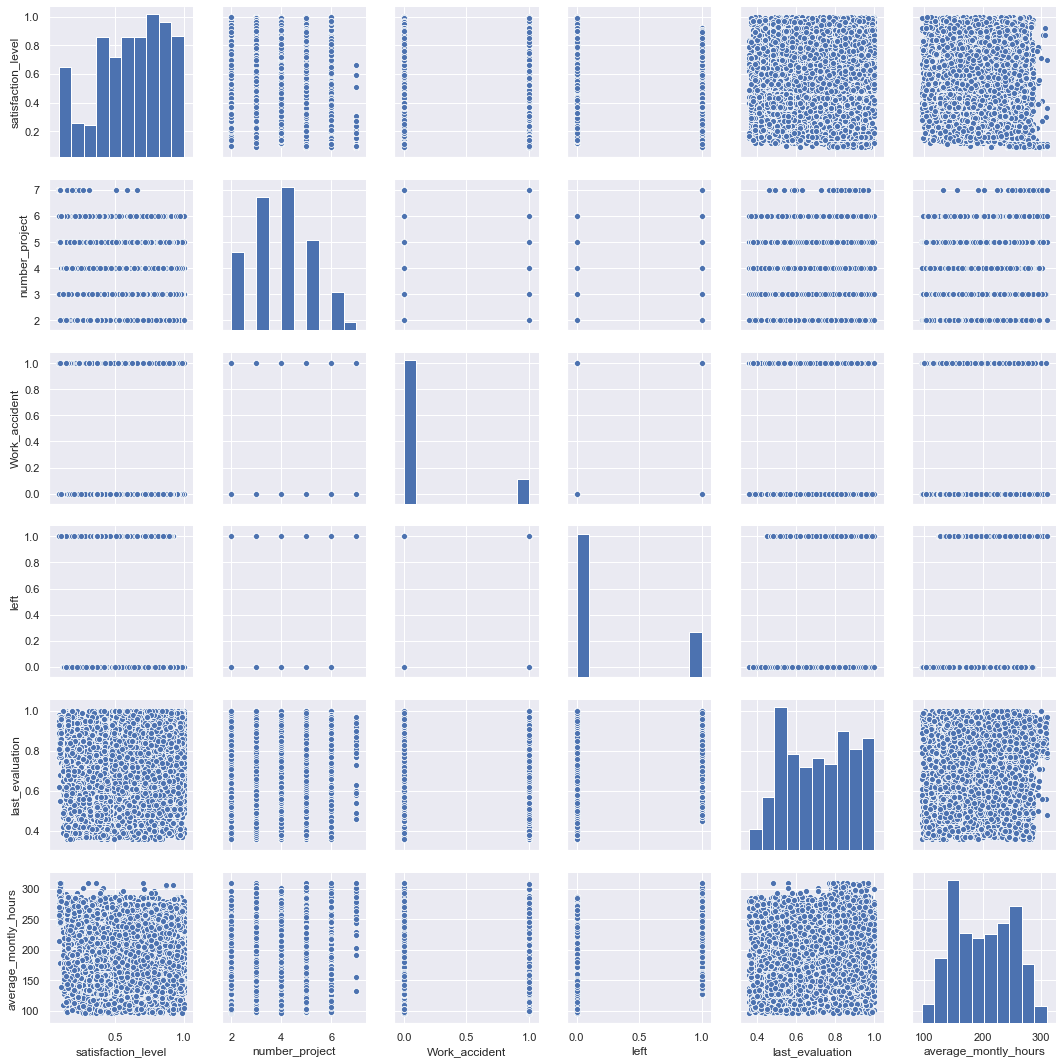

In [10]:
sns.pairplot(df, vars = ['satisfaction_level','number_project','Work_accident',
                         'left', 'last_evaluation', 'average_montly_hours'], kind = 'scatter');

### Проверим свзять между несколькими гипотезами на основе полученных данных

Нулевая гипотеза: Уволенные и действующие сотрудники работают похожее время в месяц

In [131]:
# Оберем нужные нам выборки.
df_fair = df[df['left'] == 1]['average_montly_hours']
df_unfair = df[df['left'] != 1]['average_montly_hours']

# Посмотрим объем датафрейма, чтобы в итоге привести их одному значению.
print(len(df_fair))
print(len(df_unfair))

3571
11428


In [132]:
fair = df_fair.sample(3571)
unfair = df_unfair.sample(3571)

In [133]:
statistics.variance(fair), statistics.variance(unfair)

(3745.7858381437145, 2089.6677880561356)

In [134]:
results = stats.ttest_ind(fair,unfair, equal_var= True)

In [135]:
print('p-значение:', results.pvalue)

if (results.pvalue < 0.05):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 8.836395665474981e-11
Отвергаем нулевую гипотезу


### Следующая гипотез.
    Нулевая гипотеза: C средней и высокой зарплате нет разницы в удовлетворенности сотрудников.
        возьмем только работающих сотрудников.

In [99]:
df['salary'].unique()

array(['low', 'medium', 'high'], dtype=object)

In [125]:
df_unleft = df[df['left'] == 0]
df_high_salary = df_unleft[df_unleft['salary'] == 'high']['satisfaction_level']
df_medium_salary = df_unleft[df_unleft['salary'] != 'medium']['satisfaction_level']

# Посмотрим объем датафрейма, чтобы в итоге привести их одному значению.
print(len(df_high_salary))
print(len(df_medium_salary))

1155
6299


In [126]:
high_salary = df_high_salary.sample(1155)
medium_salary = df_medium_salary.sample(1155)

In [127]:
print(len(high_salary))
print(len(medium_salary))

1155
1155


In [128]:
statistics.variance(high_salary), statistics.variance(medium_salary)

(0.04839915340580852, 0.04890167503207365)

In [129]:
results = stats.ttest_ind(high_salary,medium_salary, equal_var= True)

In [130]:
print('p-значение:', results.pvalue)

if (results.pvalue < .05):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.21147189598545688
Не получилось отвергнуть нулевую гипотезу


### Рассчитать сколько работников работает в каждом департаменте.

In [140]:
# Для этого используем value_count
df['sales'].value_counts()

sales          4140
technical      2720
support        2229
IT             1227
product_mng     902
marketing       858
RandD           787
accounting      767
hr              739
management      630
Name: sales, dtype: int64

###  Показать распределение сотрудников по зарплатам.

In [143]:
df['salary'].value_counts()

low       7316
medium    6446
high      1237
Name: salary, dtype: int64

###  Показать распределение сотрудников по зарплатам  в разрезе депортамента

In [142]:
df['agregate'] = 1
df_dep_sales = df.pivot_table(index=['sales'], columns= 'salary', values=['agregate'], aggfunc='sum')
df_dep_sales

agregate             
salary          high   low medium
sales                            
IT                83   609    535
RandD             51   364    372
accounting        74   358    335
hr                45   335    359
management       225   180    225
marketing         80   402    376
product_mng       68   451    383
sales            269  2099   1772
support          141  1146    942
technical        201  1372   1147

In [149]:
df_left = df[df['left'] == 1]
left_company = df_left['agregate'].count()

print(f'{left_company} сотрудников покинуло компанию')

3571 сотрудников покинуло компанию


### Проверить несколько гипотез для данных, чтобы понять почему сотрудники покидают компанию.

Для того чтобы ответить на этот вопрос нужно найти зависимости от в резрезе уволен не уволен.

In [152]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 11 columns):
satisfaction_level       14999 non-null float64
last_evaluation          14999 non-null float64
number_project           14999 non-null int64
average_montly_hours     14999 non-null int64
time_spend_company       14999 non-null int64
Work_accident            14999 non-null int64
left                     14999 non-null int64
promotion_last_5years    14999 non-null int64
sales                    14999 non-null object
salary                   14999 non-null object
agregate                 14999 non-null int64
dtypes: float64(2), int64(7), object(2)
memory usage: 1.3+ MB


In [156]:
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary,agregate
0,0.38,0.53,2,157,3,0,1,0,sales,low,1
1,0.80,0.86,5,262,6,0,1,0,sales,medium,1
2,0.11,0.88,7,272,4,0,1,0,sales,medium,1
3,0.72,0.87,5,223,5,0,1,0,sales,low,1
4,0.37,0.52,2,159,3,0,1,0,sales,low,1


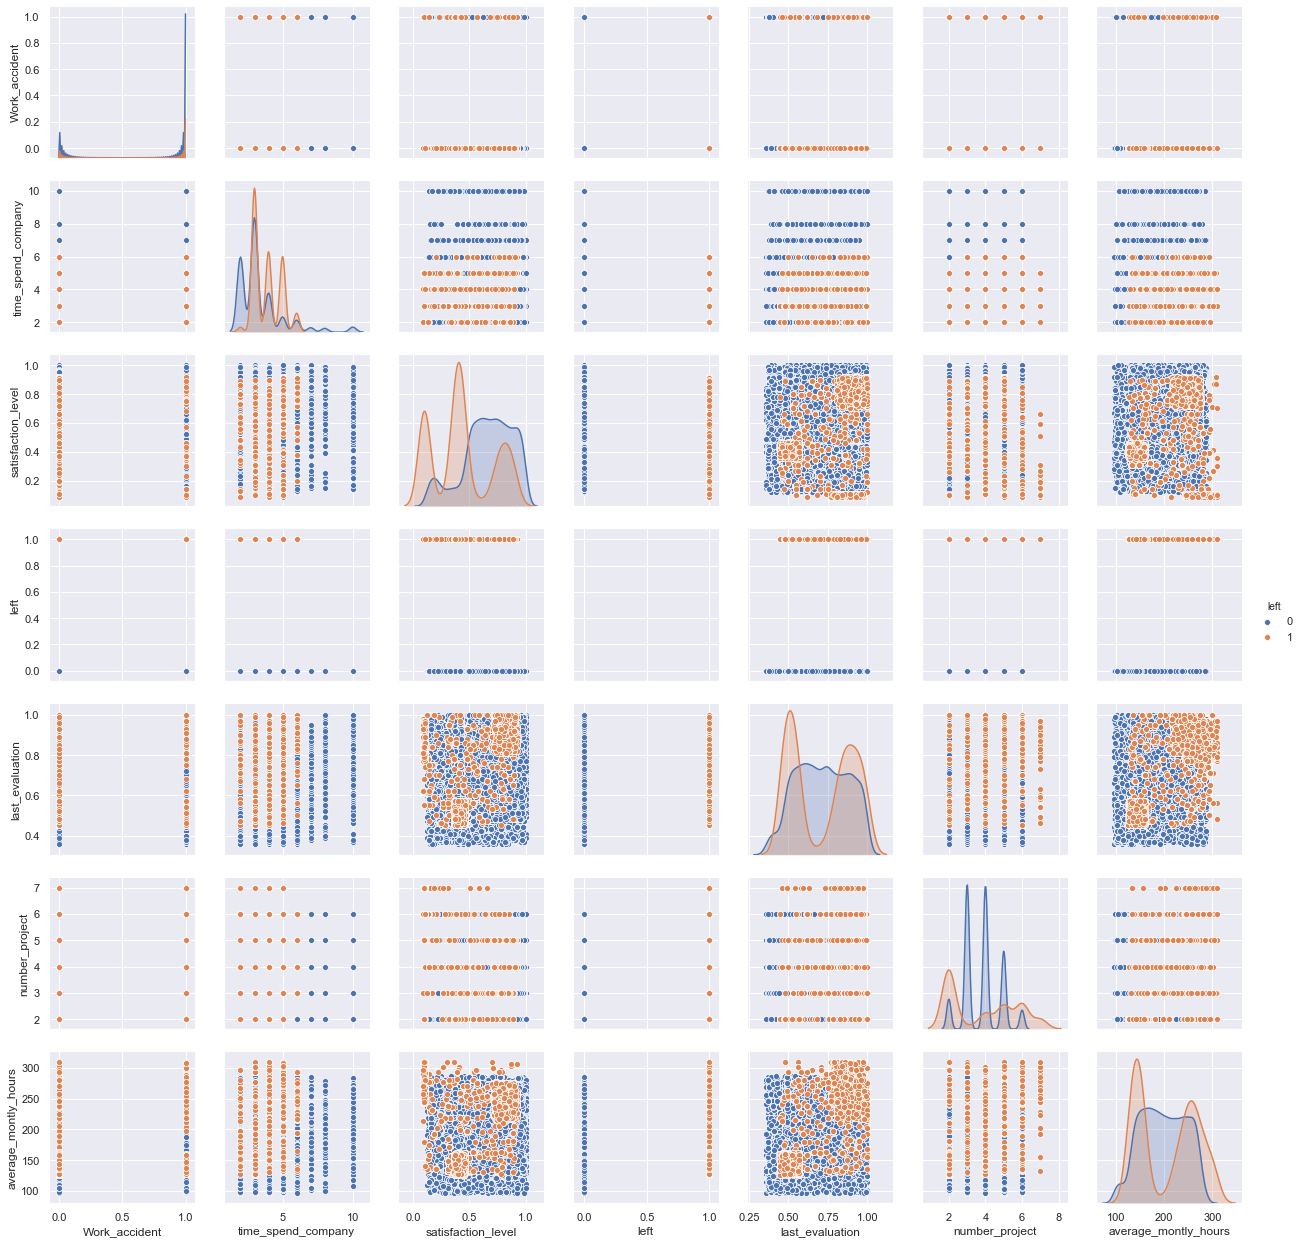

In [158]:
fig = sns.pairplot(data=df[['Work_accident', 'time_spend_company','satisfaction_level', 'left', 'last_evaluation', 'number_project', 'average_montly_hours']], hue='left')
plt.show()

Проверим так же две гипотезы, почему сотрудники увольняются. Первая наиболее для меня очевидная из графиков это зависимость от проекта на котором работал сотрудник и вторая после 6 го года работы в копании люди уходят.

In [171]:
# нулевая гипотеза: люди проработавшие больше 5 лет чаще уходят из компании.

# Оберем нужные нам выборки.
df_to_6_year = df[df['time_spend_company'] < 6]['left']
df_6_year_after = df[df['time_spend_company'] >= 6]['left']

# Посмотрим объем датафрейма, чтобы в итоге привести их одному значению.
print(len(df_to_6_year))
print(len(df_6_year_after))

13717
1282


In [172]:
to_6_year = df_to_6_year.sample(1282)
year_after = df_6_year_after.sample(1282)

In [173]:
statistics.variance(to_6_year), statistics.variance(year_after)

(0.17560201237089296, 0.1365553919580671)

In [174]:
results = stats.ttest_ind(to_6_year,year_after, equal_var= True)

In [175]:
print('p-значение:', results.pvalue)

if (results.pvalue < .05):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 4.277568534604835e-05
Отвергаем нулевую гипотезу


Нулевая гипотеза: увольнение зависит проекта на котором находится сотрудник

In [176]:
# Оберем нужные нам выборки.
df_unleft_pr = df[df['left'] == 0]['number_project']
df_left_pr = df[df['left'] == 1]['number_project']

# Посмотрим объем датафрейма, чтобы в итоге привести их одному значению.
print(len(df_unleft_pr))
print(len(df_left_pr))

11428
3571


In [178]:
unleft_pr = df_unleft_pr.sample(3571)
left_pr = df_left_pr.sample(3571)

In [179]:
statistics.variance(unleft_pr), statistics.variance(left_pr)

(0.9789899493821611, 3.305725314488719)

In [180]:
results = stats.ttest_ind(unleft_pr,left_pr, equal_var= True)

In [181]:
print('p-значение:', results.pvalue)

if (results.pvalue < .05):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.08808995906074851
Не получилось отвергнуть нулевую гипотезу
